# Kaggle Competition avaible on : https://www.kaggle.com/competitions/playground-series-s5e3/overview

In [753]:
#Package de base
import pandas as pd
import numpy as np
from termcolor import colored
import skimpy 

import os
import warnings
warnings.filterwarnings("ignore")


#package visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#package statisiques
from scipy.stats import shapiro, kendalltau, kruskal, mannwhitneyu

#package preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

## Rééchantillonge SMOTE sur la base d'apprentissage
from imblearn.over_sampling import SMOTE



## 1. Data Knowledge

In [754]:
path = "D:\\etude_data_science\\Kaggle_competition\\14_Binary_Prediction_with_a_Rainfall\dataset\\"
# pd.read_csv(path)
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
sample = pd.read_csv(path+"sample_submission.csv")

In [755]:
df = train.copy()
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [16]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2190   │ │ float64     │ 10    │                                                          │
│ │ Number of columns │ 13     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ id                 │    0 │      0 │   1100 │    630 │      0 │    550 │   1100 │   1600 │  2200 │ ▇▇▇▇▇▇  │  │
│ │ day                │    0 │      0 │    180 │    110 │      1 │     89 │    180 │    270 │   360 │ ▇▇▇▇▇▇  │  │
│ │ pressure           │    0 │      0 │   1000 │    5.7 │   1000 │   1000 │   1000 │   1000 │  1000 │   ▇▇▆▁  │  │
│ │ maxtemp            │    0 │      0 │     26 │    5.7 │     10 │     21 │     28 │     31 │    36 │  ▃▅▃▇▅  │  │
│ │ temparature        │    0 │      0 │     24 │    5.2 │    7.4 │     19 │     26 │     28 │    32 │  ▂▅▃▆▇  │  │
│ │ mintemp            │    0 │      0 │     22 │    5.1 │      4 │     18 │     24 │     26 │    30 │  ▁▃▅▆▇  │  │
│ │ dewpoint           │    0 │      0 │     20 │    5.3 │   -0.3 │     17 │     22 │     25 │    27 │   ▁▃▃▇  │  │
│ │ humidity           │    0 │      0 │     82 │    7.8 │     39 │     77 │     82 │     88 │    98 │   ▁▅▇▅  │  │
│ │ cloud              │    0 │      0 │     76 │     18 │      2 │     69 │     83 │     88 │   100 │  ▁▂▂▅▇  │  │
│ │ sunshine           │    0 │      0 │    3.7 │    3.6 │      0 │    0.4 │    2.4 │    6.8 │    12 │ ▇▃▁▂▂▁  │  │
│ │ winddirection      │    0 │      0 │    100 │     80 │     10 │     40 │     70 │    200 │   300 │  ▇▇▁▂▅  │  │
│ │ windspeed          │    0 │      0 │     22 │    9.9 │    4.4 │     14 │     20 │     28 │    60 │  ▅▇▆▃▁  │  │
│ │ rainfall           │    0 │      0 │   0.75 │   0.43 │      0 │      1 │      1 │      1 │     1 │ ▃    ▇  │  │
│ └────────────────────┴──────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [39]:
df.nunique()

id               2190
day               365
pressure          236
maxtemp           219
temparature       198
mintemp           199
dewpoint          218
humidity           49
cloud              78
sunshine          120
winddirection      35
windspeed         223
rainfall            2
dtype: int64

## Observation : 
- We have  13 columns and 2190 rows
-  int (3): in these we have the id, the number of day and the **target**
    - id, day and **rainfall** (binary target 0/1; 0 = norainfall;1=rainfall)
- float (10) : all these features give details about weather conditions 
    - the pressure, the maximal temperature, minimal, dew point, humidity, cloud, sunshine, wind direction and speed

- No qualitative features

#### All of them seem correctly encoded : int for discret features and float for continous features.

- Try to understand some features :
#### day :
As we can see, id = 2190 and day 365, so we have a loop of day. We can suppose it's 365 day * X years = 2190 :

In [52]:
print("Total day / 365 day =", int(df.shape[0]/max(df.day)),"years in this dataframe")

Total day / 365 day = 6 years in this dataframe


We can create a new features "year" which take +1 in every year
1. Let's verify if we have all 365 day in the dataframe
2. We verify if we have the same occurence for each day with a value_count
3. second, we'll create a list containing the number of years

In [316]:
#1
df[df.day == 365]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
364,364,365,1013.0,21.0,19.3,17.9,17.3,94.0,88.0,0.1,60.0,42.0,1
729,729,365,1016.8,20.4,18.5,17.4,18.2,77.0,97.0,0.1,40.0,43.8,1
1094,1094,365,1017.0,22.1,20.8,19.6,18.0,91.0,88.0,0.0,40.0,46.3,1
1824,1824,365,1013.3,17.4,16.6,15.3,15.4,96.0,91.0,1.6,60.0,43.8,1
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


- We only have the date 365 5 times, even though we have 6 years of data. Perhaps the last year ends on day = 364?
- let's see if the last id we have day = 365

In [391]:
df[df.id.max() == df.id]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


- It ends up at 365 days, but there may be a problem with the data, let's check it out.
- normally, each date must be repeated 6 times, since we're talking about 6 years.

In [408]:
#2
df.day.value_counts()

day
1      6
252    6
250    6
249    6
248    6
      ..
121    6
120    6
119    6
118    6
365    6
Name: count, Length: 365, dtype: int64

We confirm that there is an occurence problem 

In [302]:
#we isolate the days that are repeated 7 times
anormal_days = df.day.value_counts()[df.day.value_counts() == 7].index

In [314]:
print("5 first anormal days : ", sorted(anormal_days)[:5])
#for example, take day = 3 :
df[df.day == 3]

5 first anormal days :  [3, 4, 5, 6, 7]


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,year
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,1
367,367,3,1012.0,20.8,17.6,15.7,4.8,75.0,88.0,3.8,40.0,29.6,1,2
732,732,3,1013.5,23.2,18.0,17.5,16.0,79.0,81.0,0.0,60.0,55.5,1,3
1037,1037,3,1015.2,25.0,23.9,23.6,19.9,76.0,61.0,8.8,90.0,14.1,0,3
1097,1097,3,1016.4,16.7,15.6,14.7,11.4,79.0,91.0,0.0,60.0,55.5,1,4
1462,1462,3,1017.7,20.9,19.3,18.9,18.0,87.0,91.0,0.0,70.0,50.7,1,4
1827,1827,3,1014.9,16.4,15.3,14.4,14.0,96.0,100.0,0.0,50.0,55.5,1,5


- As you can see that there's a repetition problem with the id column, for example id = 1037 & id = 1097, there's not 365 days difference.
- So there are date errors

* To create a 365 day cycle, we're going to use modulo 365 on all the data lines

    - df.index % 365 : creates a cycle from 0 to 364.
    - we add a +1 → adjusts to start at 1 and end at 365

In [396]:
df["day_cycle"] = (df.id % 365) +1

Now let's compare day & day_cycle to understand : 
- for example with day = 3, because we know there are some errors : 

In [370]:
df[df.day==3]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,day_cycle
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,3
367,367,3,1012.0,20.8,17.6,15.7,4.8,75.0,88.0,3.8,40.0,29.6,1,3
732,732,3,1013.5,23.2,18.0,17.5,16.0,79.0,81.0,0.0,60.0,55.5,1,3
1037,1037,3,1015.2,25.0,23.9,23.6,19.9,76.0,61.0,8.8,90.0,14.1,0,308
1097,1097,3,1016.4,16.7,15.6,14.7,11.4,79.0,91.0,0.0,60.0,55.5,1,3
1462,1462,3,1017.7,20.9,19.3,18.9,18.0,87.0,91.0,0.0,70.0,50.7,1,3
1827,1827,3,1014.9,16.4,15.3,14.4,14.0,96.0,100.0,0.0,50.0,55.5,1,3


- line 1037, As we can see, normally it's the 308th day not 3
- id = 732, day = 3 is correct, so, if we had 365 day, normally we have : 

In [403]:
print("Start day : 732")
print("Final day is start day+ a year : 732 + 365 =", 732+365)

Start day : 732
Final day is start day+ a year : 732 + 365 = 1097


- We have id = 1097, it's correct, but we have at id = 1037; day = 3, it's not correct
- So we can replace it with our new, corrected column 

In [400]:
df["day"] = df.day_cycle
df.drop("day_cycle", inplace=True, axis = 1) #remove

Now we'll scan the number of days, and each time we come to 365, we'll add the year +1.

In [404]:
#3
def newyear_column(column):
    """function that converts 365 days into a year (provided the data is correctly ordered) """
    years = [] #will contain all row with the number of year
    cpt = 1  # Current year

    for i in df.day:
        years.append(cpt)  # we add current year to list
        if i == 365:  # if we reach the last day of the year
            cpt += 1  # we move into the new year
    df[column] = years  # Ajouter la liste comme colonne au DataFrame
newyear_column("year")

In [405]:
df.year.value_counts()

year
1    365
2    365
3    365
4    365
5    365
6    365
Name: count, dtype: int64

- As we can see, it's start to year 1 and finish to year 5 (and no 6 because we havn't the new day 1). but we have all 6 years in the dataset
- we gonna move the year column next to day

In [406]:
year_col = df.pop("year")
df.insert(2,"year", year_col)

In [407]:
df.head()

,id,day,year,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


Now that we've understood the data set, let's visualise it
## 2. Datavizualisation :
Firstly, we are going the separate the data according to their dtype 

In [185]:
var_cont = [i for i in df.select_dtypes(float) if i !="id"] #continuous variables
var_dis = [i for i in df if i not in var_cont and i != "id"]

In [181]:
print(len(var_cont+var_dis)+1 ==  df.shape[1]) #+1 because we deleted "id"
#That displays ‘True’, so we haven't forgotten any variables

True


###  Continous Feature

In [279]:
def var_cont_vizualisation(col,data, nrow,size=(14,20)):
    """
    col : list
    data : dataframe
    nrow : int
    For each feature, this returns two figures: histplot/boxplot with skew
    """
    
    plt.figure(figsize=size)
    for i,k in enumerate(col):
        #histplot :
        plt.subplot(nrow,2,i*2+1)
        sns.histplot(x = k, data = data, color = "slateblue",kde=True, )
        plt.title(f"Skew : {round(df[k].skew(),2)}")
        plt.axvline(df[k].mean(), ls="--", c = "red", label = "mean")
        plt.axvline(df[k].median(),ls=":", c = "green", label = "median")
        plt.legend()
        
        #boxplot
        plt.subplot(nrow,2,i*2+2)
        sns.boxplot(x = k, data = data, color="orange", showmeans=True)
        plt.tight_layout()
    plt.show()

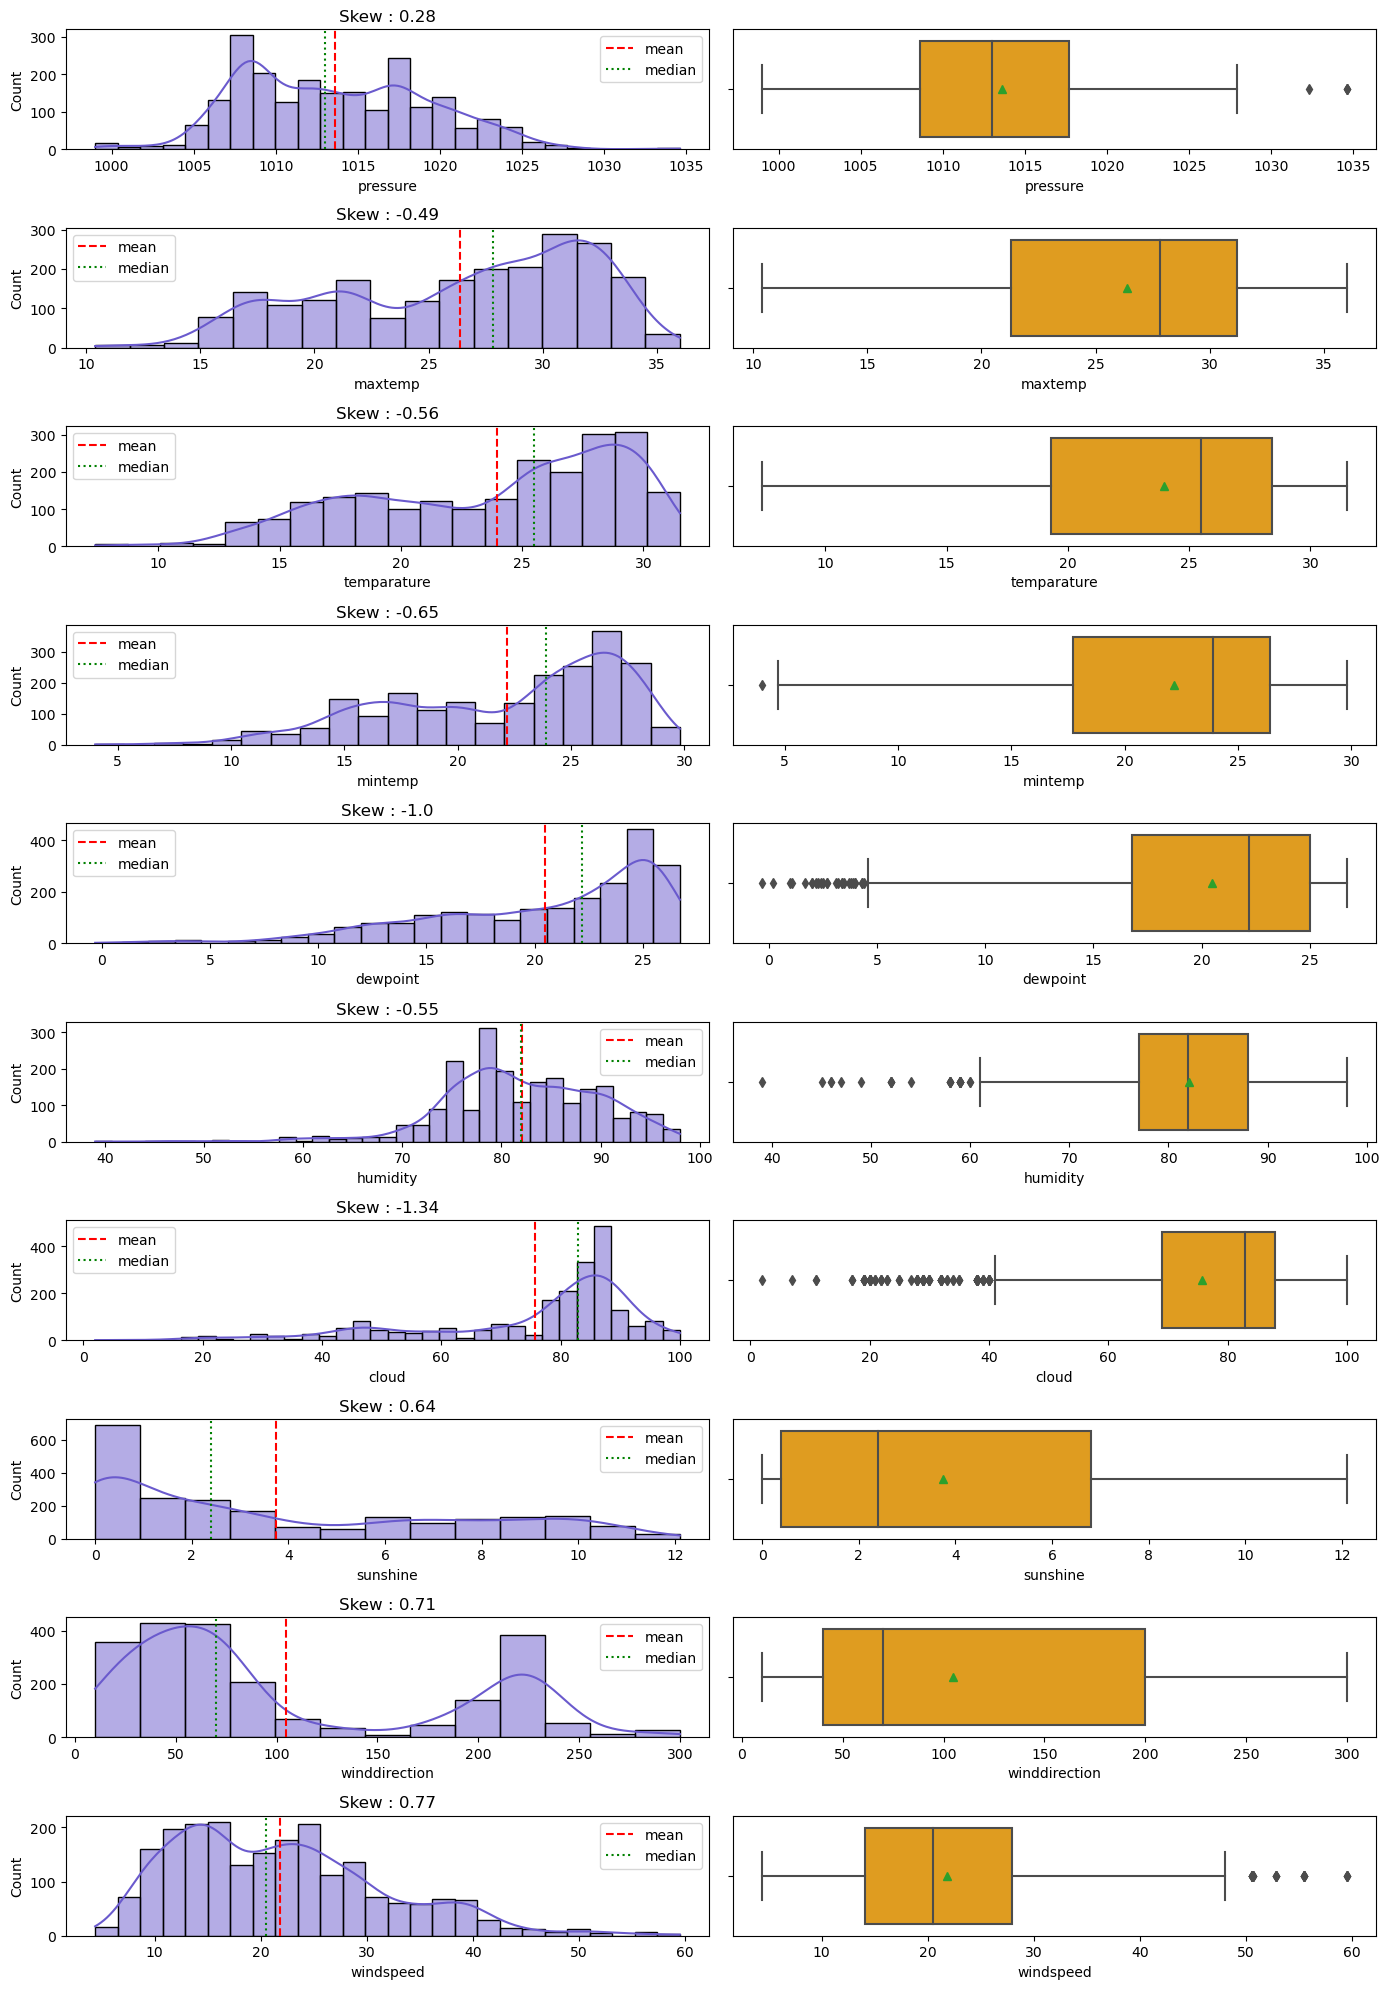

In [280]:
var_cont_vizualisation(var_cont,df, 10,size=(14,20))

In [201]:
def shapiro_test(list_col):
    """
    This function test  if list_col is a list, if not,
    it converted the text in a list before a shapiro test to check 
    if the feature follow a normal distribution
    """
    if type(list_col) != list:
        list_col = [list_col]

    accepted,rejected = [], []

    for col in df[list_col]:
        stat, p_value = shapiro(df[col])  
        alpha = 0.05
        if p_value > alpha: 
            result = colored('Accepted', 'green')  
            accepted.append(col)
        else:
            result = colored('Rejected','red')        
            rejected.append(col)

        print(f'{col:-<50}\t Hypothesis: {result}')
    return accepted,rejected

print(colored("Test shapiro :", "blue"))
a,r = shapiro_test(var_cont)

Test shapiro :
pressure------------------------------------------	 Hypothesis: Rejected
maxtemp-------------------------------------------	 Hypothesis: Rejected
temparature---------------------------------------	 Hypothesis: Rejected
mintemp-------------------------------------------	 Hypothesis: Rejected
dewpoint------------------------------------------	 Hypothesis: Rejected
humidity------------------------------------------	 Hypothesis: Rejected
cloud---------------------------------------------	 Hypothesis: Rejected
sunshine------------------------------------------	 Hypothesis: Rejected
winddirection-------------------------------------	 Hypothesis: Rejected
windspeed-----------------------------------------	 Hypothesis: Rejected


###  discrete Feature

In [281]:
def varqual_viz(col,data, nrow,ncol,size=(14,8)):
    plt.figure(figsize=size)
    for i,k in enumerate(col):
        plt.subplot(nrow,ncol,i+1)
        ax = sns.countplot(x = k, data = data)
        lab = ax.get_xticklabels()
        ax.set_xticklabels(lab,rotation=45)
        plt.tight_layout()
    plt.show()


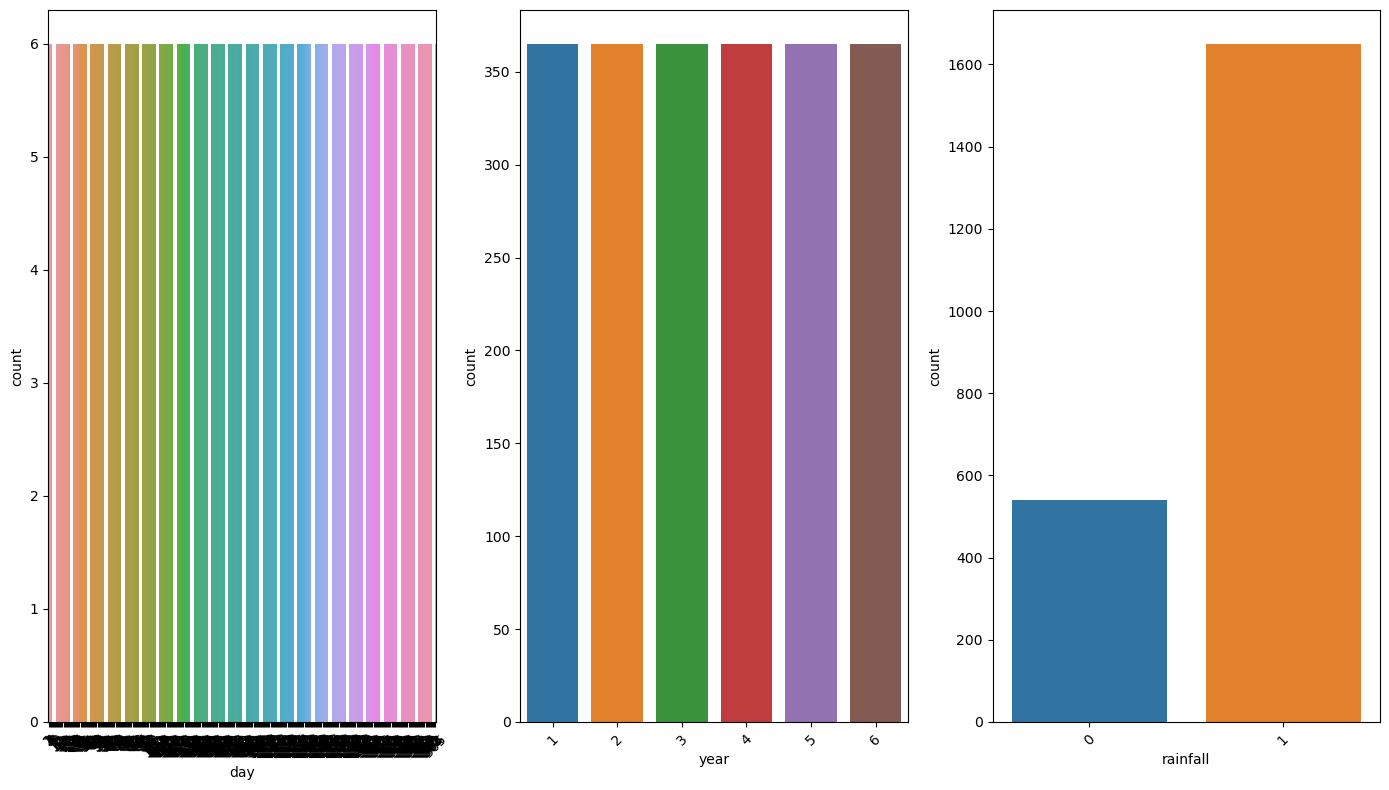

In [409]:
varqual_viz((var_dis),data=df, nrow=1,ncol=3,size=(14,8))

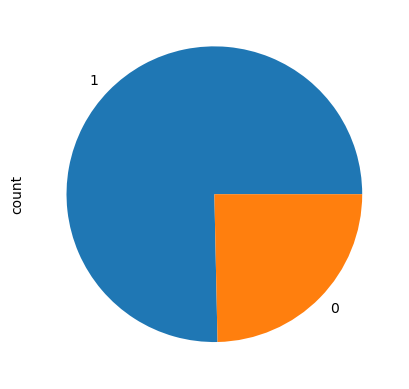

In [417]:
df.rainfall.value_counts().plot(kind="pie")
plt.show()

### Observation : 
- each value of day and year are equal (during the first run, I saw some value of day was inequal, this is why in the part 1 did further analyse about the column day and I notice there was a problem with)
- Rainfall : it is clear from the pie chart that we have 3/4 (of 1) and  1/4 (of 0) proportions
    - so, it rains more often than it's dry
    
#### for modelling, we have to use SMOTE to  oversampling the dataset because we have few data

### Bivariate analysis : 
- Target Vs discrete feature 

Here the only revelant feature is year

In [479]:
pd.crosstab(df["year"],df["rainfall"],margins=True)

rainfall,0,1,All
year,,,
1,99,266,365
2,90,275,365
3,93,272,365
4,91,274,365
5,89,276,365
6,78,287,365
All,540,1650,2190


In [544]:
cross = pd.crosstab(df["year"],df["rainfall"])
cross = cross.reset_index()

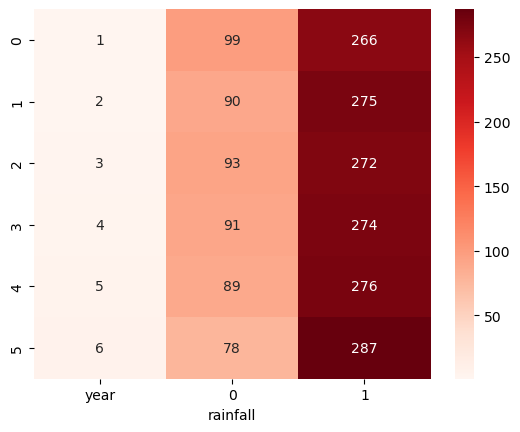

In [545]:
sns.heatmap(cross, fmt = "d", cmap="Reds", annot=True)
plt.show()

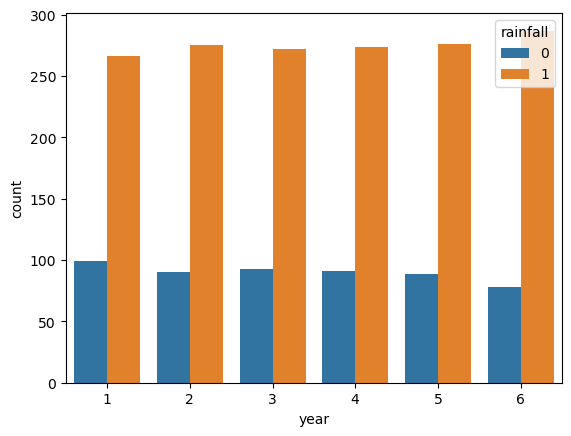

In [546]:
cross = cross.melt(id_vars="year", var_name="rainfall", value_name="count")
sns.barplot(x = "year", y = "count", hue = "rainfall", data = cross)
plt.show()

#### Observation :
- It's easy to see how the number of rainy days has changed over the years here
- You can see that there is very little variation

### Target Vs continuous feature

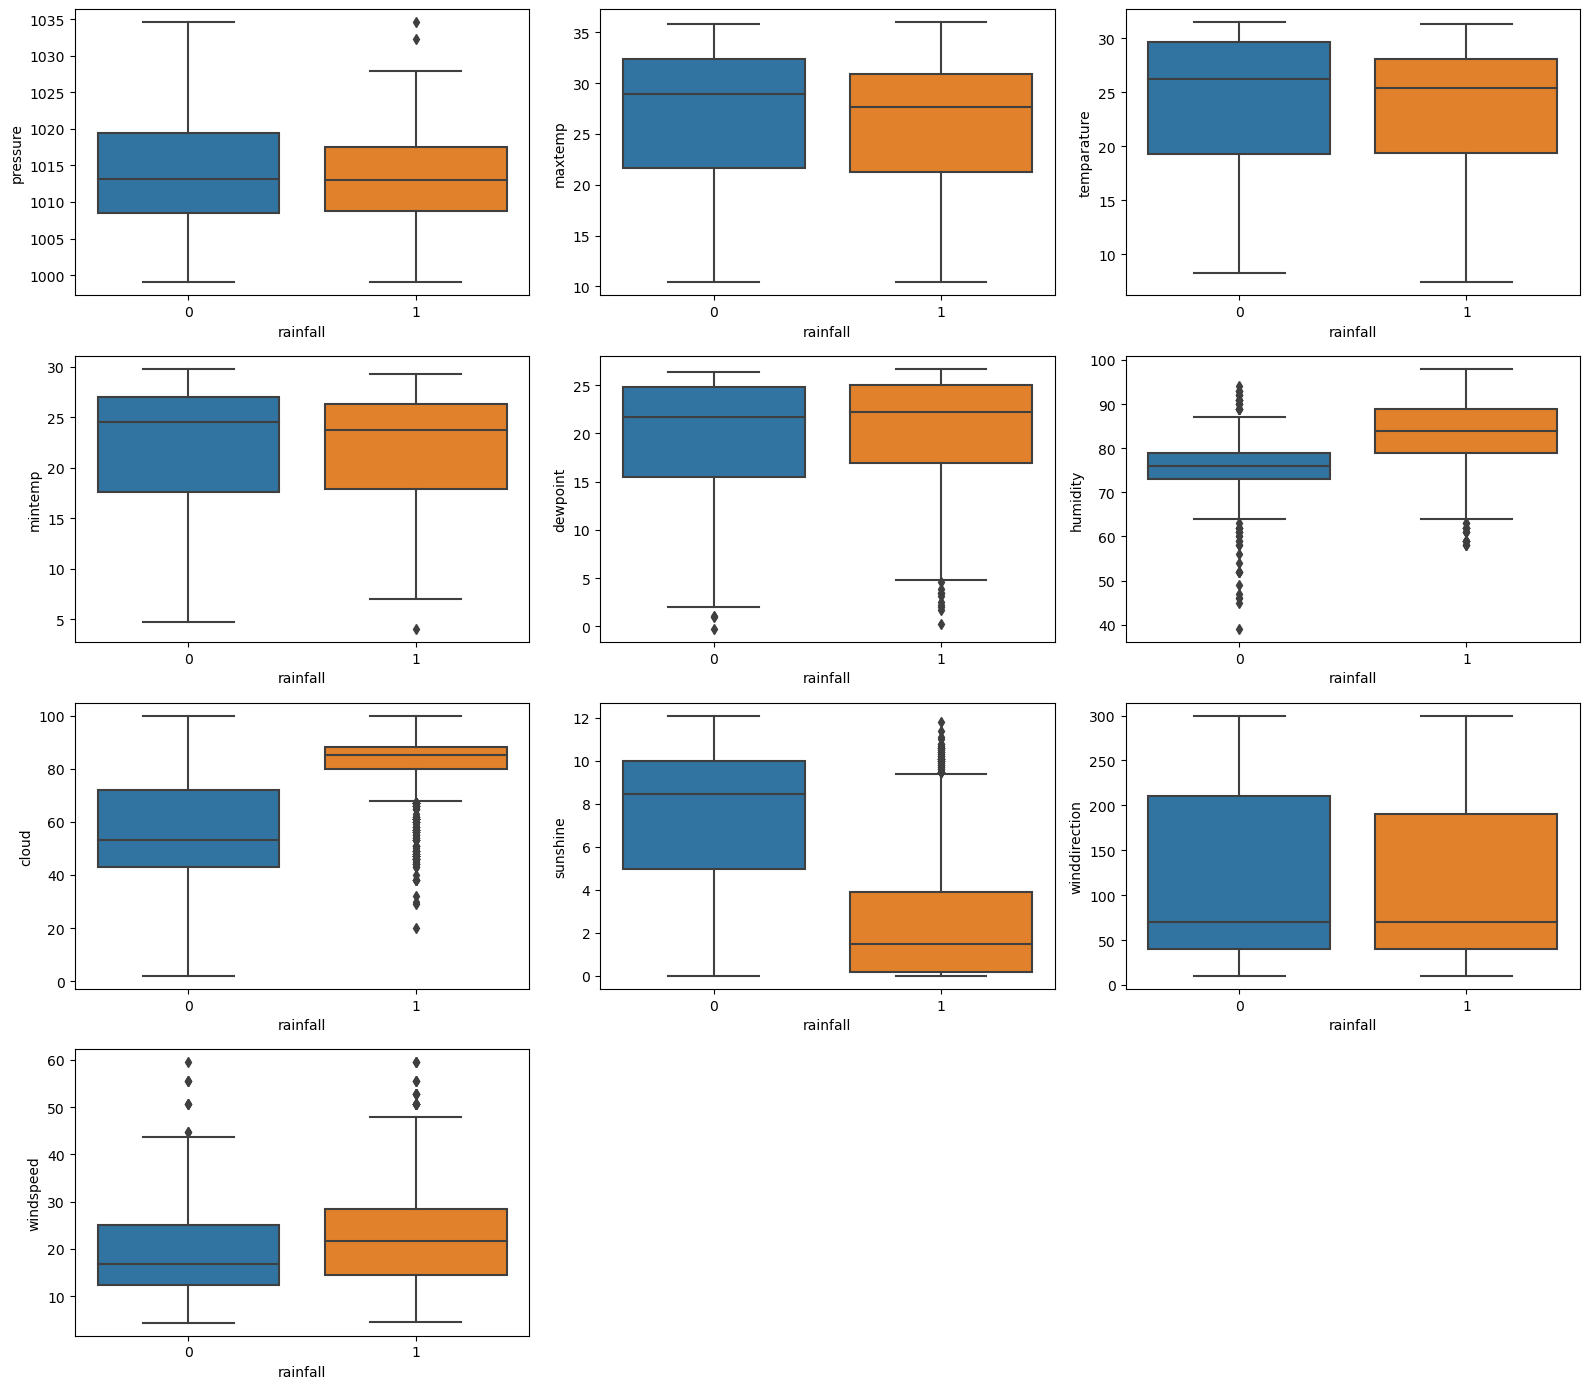

In [569]:
def boxplot_2feat(list_col,nrow,ncol, size=(16,14)):
    plt.figure(figsize=size)
    for i,col in enumerate(list_col,1):
        plt.subplot(nrow,ncol,i)
        sns.boxplot(x= "rainfall", y=col, data = df)
    plt.tight_layout()    
    
boxplot_2feat(var_cont,4,3)

#### Observation : 
- Interesting results: we can see some median variation according rainfall value
- But there is very little impact on the value of the target as a function of : **pressure, winddirection, maxtemp, mintemp** and **dewpoint**


* **Statistical tests** can be used to confirm whether or not there is a dependency between target and continous features
* on the one hand we have a bimodal variable (target) and on the other variables which do not follow a continuous distribution: so we need to do a manwhitney test 

## 3. Statistical tests :

In [583]:
def manwithney(features, target, dataframe, retour=False):
    var_a_conserver, var_a_supprimer = [], []
    if isinstance(features, str):
        features = [features]

    print(colored("P-values :", "blue")) 
    print()

    # Test de Mann-Whitney sur chaque variable continue
    for feat in features:
        # Séparation en deux groupes selon `target`
        group1 = dataframe[dataframe[target] == dataframe[target].unique()[0]][feat]
        group2 = dataframe[dataframe[target] == dataframe[target].unique()[1]][feat]

        # Mann-Whitney test
        stat, pval = mannwhitneyu(group1, group2)
        alpha = 0.01  # threshold

        if pval < alpha:
            print(f'{colored(feat, "green")} : {pval}')
            var_a_conserver.append(feat)
        else:
            print(f'{colored(feat, "red")} : {pval}')
            var_a_supprimer.append(feat)

    print()
    print(colored("Feature to keep", "green", attrs=["bold"]), var_a_conserver)
    print(colored("Feature to delete", "red", attrs=["bold"]), var_a_supprimer)

    if retour:
        return var_a_conserver, var_a_supprimer


In [584]:
keepfeature, deletefeature = manwithney(var_cont, "rainfall",dataframe=df ,retour=True)

P-values :

pressure : 0.1245572101597781
maxtemp : 6.067480840587285e-07
temparature : 5.955487939970768e-05
mintemp : 0.003845276171896574
dewpoint : 0.014221859678821263
humidity : 1.8184204226392426e-109
cloud : 1.1685112588277036e-151
sunshine : 4.291486561510209e-126
winddirection : 0.20936064268143184
windspeed : 1.469472735752568e-09

Feature to keep ['maxtemp', 'temparature', 'mintemp', 'humidity', 'cloud', 'sunshine', 'windspeed']
Feature to delete ['pressure', 'dewpoint', 'winddirection']


- as we think : pressure, dewpoint and winddirection doesn't influence rainfall
- But notice the statisticall test seem to show us we should keep maxtemp and mintemp

## 4. Preprocessing :
- Here we will prepare the data to the modelisation :
1. deleting columns
2. standardisation of continuous variables
3. use of SMOTE to create surface data to balance the target

Note : There is some debate, some people recommend using SMOTE before preprocessing, others the opposite.
Here we are going to use preprocessing before

### 1. Deleting columns :
#### Removal of columns after statistical test

In [756]:
#1. Deleting column by exclusion : 
df = df[df.columns[~df.columns.isin(deletefeature)]] #we keep only columns which are not include in "deletefeature"
df.head()

,id,day,maxtemp,temparature,mintemp,humidity,cloud,sunshine,windspeed,rainfall
0,0,1,21.2,20.6,19.9,87.0,88.0,1.1,17.2,1
1,1,2,16.2,16.9,15.8,95.0,91.0,0.0,21.9,1
2,2,3,19.4,16.1,14.6,75.0,47.0,8.3,18.1,1
3,3,4,18.1,17.8,16.9,95.0,95.0,0.0,35.6,1
4,4,5,21.3,18.4,15.2,52.0,45.0,3.6,24.8,0


In [757]:
#Remove in var_cont too
var_cont = [i for i in var_cont if i not in deletefeature]

#### Removal day and year :
- we've created the year feature to make it easier to see, but from the graphs, day and year don't seem to be relevant

In [759]:
df = df.drop(["day","year"], axis = 1)

#### 2. Preprocessing : StandardScaler

In [760]:
#Split the data : 
X,y = df.drop("rainfall", axis = 1), df["rainfall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [761]:
X_train.head(3)

,id,maxtemp,temparature,mintemp,humidity,cloud,sunshine,windspeed
162,162,31.0,29.3,27.1,79.0,77.0,4.6,13.9
1873,1873,22.3,20.1,18.8,91.0,80.0,0.0,12.4
1366,1366,29.1,27.5,26.0,65.0,51.0,8.6,39.3


In [762]:
#Scaled the data
scaler = StandardScaler()
scaler.fit(X_train[var_cont]) #training on train set 

#Scaled to the dataset :
X[var_cont] = pd.DataFrame(scaler.transform(X[var_cont])) #transformation

In [763]:
X.head(3)

,id,maxtemp,temparature,mintemp,humidity,cloud,sunshine,windspeed
0,0,-0.906281,-0.638424,-0.446678,0.634168,0.679555,-0.725728,-0.466825
1,1,-1.793976,-1.351913,-1.265296,1.665436,0.846170,-1.030378,0.003899
2,2,-1.225851,-1.506180,-1.504892,-0.912734,-1.597526,1.268351,-0.376686


- Now we're going to work with this database X which has undergone preprocessing to apply the SMOTE

In [766]:
# We split the data in the same order as for preprocessing, with the same lines used for the train and the test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(3)

,id,maxtemp,temparature,mintemp,humidity,cloud,sunshine,windspeed
162,162,0.833603,1.039239,0.990896,-0.397100,0.068631,0.243616,-0.797332
1873,1873,-0.710987,-0.734841,-0.666307,1.149802,0.235246,-1.030378,-0.947563
1366,1366,0.496279,0.692136,0.771267,-2.201819,-1.375372,1.351438,1.746576


- As you can see, in this X_train we have the same first rows than before scaled the data
- Now we can apply SMOTE

#### 3. Rebalance the minority class by adding artificial data with SMOTE 

In [767]:
# Initialization of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply smote on train set :
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Creation of a new dataframe with SMOTE data :
df_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

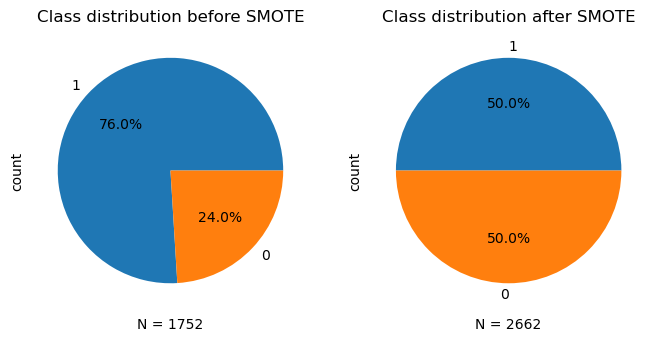

In [768]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
y_train.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.xlabel(f"N = {len(y_train)}")
plt.title("Class distribution before SMOTE")
plt.subplot(1,2,2)
y_train_smote.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.xlabel(f"N = {len(y_train_smote)}")

plt.title("Class distribution after SMOTE")
plt.show()

In [769]:
print("before SMOTE (y_train):\n")
print(y_train.value_counts()) 

before SMOTE (y_train):

rainfall
1    1331
0     421
Name: count, dtype: int64


Explanation :
- As we can see, before SMOTE we have only 421 rows Vs 1331
- SMOTE will add x lines to equalize the majority class
    - So 421 + x = 1331 => 910 rows
- And if u add 910 lines to 1752 lines (before smote) => we got 2662 lines (after smote)

#### preprocessing on  Test set :

In [778]:
test[var_cont] = scaler.transform(test[var_cont]) #transformation
preprocessed_test = test[X_train_smote.columns]

In [793]:
preprocessed_test.head()

,id,maxtemp,temparature,mintemp,humidity,cloud,sunshine,windspeed
0,2190,-1.563175,-1.564031,-1.884251,1.794344,1.290479,-1.030378,0.244268
1,2191,-1.563175,-1.429047,-1.265296,1.923253,1.290479,-1.030378,1.345961
2,2192,-2.681672,-2.605339,-2.543139,0.505260,1.123863,-1.030378,-0.496871
3,2193,-1.012804,-1.274779,-1.385094,-0.912734,-1.708603,0.936005,2.878315
4,2194,-1.811730,-1.949700,-3.142128,-1.815093,-1.486449,1.517611,-0.246486


# 5. Saving datasets

In [795]:
#Train SMOTE : 
df_smote.to_csv("train_SMOTE.csv")
#X_test,y_test : 
validation_set = pd.concat([X_test,y_test], axis = 1).to_csv("validation.csv")
#preprocessed test : 
preprocessed_test.to_csv("preprocessed_test.csv")